In [1]:
#importando libs gerais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None) # configuração para mostrar todas as colunas
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


## Análise exploratória

Aqui o objetivo é conseguir ter uma compreensão geral do dataset. Entender como estão dispostas as variáveis e um pouco do seu comportamento. Devido o tamanho do dataset e o tempo de entrega do projeto, não passarei todas as colunas por uma mesma análise individual

### Visão geral

In [2]:
df = pd.read_csv('../data/telco_v2.csv')

In [3]:
# de cara observei que algumas colunas textuais possuem a mesma string mas com diferenciação no case
# isso pode causar problemas no encoding
# vou normalizar passando tudo para minusculo
from helpers.data_cleaning import df_to_lowercase

df = df_to_lowercase(df)
df.head()

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Avg Monthly GB Streaming Movies,Avg Monthly GB Streaming Music,Avg Monthly GB Streaming TV,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Label,Churn Score,Churn Category,Churn Reason
0,8779-qrdmv,male,78.0,no,no,0.0,united states,california,los angeles,90022.0,34.023810,-118.156582,68701.0,q3,no,0.0,1.0,NaN,no,0.00,no,dsl,8.0,no,no,yes,no,no,yes,no,0,2,0,no,month-to-month,yes,bank withdrawal,39.65,39.65,0.00,20.0,0.00,59.65,churned,yes,91.0,competitor,competitor offered more data
1,7495-ookfy,female,74.0,yes,yes,1.0,united states,california,los angeles,90063.0,34.044271,-118.185237,55668.0,q3,yes,1.0,8.0,offer e,yes,48.85,yes,fiber optic,17.0,no,yes,no,no,no,no,no,0,0,0,yes,month-to-month,yes,credit card,80.65,633.30,0.00,0.0,390.80,1024.10,churned,yes,69.0,competitor,competitor made better offer
2,1658-bygoy,male,71.0,no,yes,3.0,united states,california,los angeles,90065.0,34.108833,-118.229715,47534.0,q3,no,0.0,18.0,offer d,yes,11.33,yes,fiber optic,52.0,no,no,no,no,yes,yes,yes,0,0,2,yes,month-to-month,yes,bank withdrawal,95.45,8739.55,45.61,0.0,203.94,1910.88,churned,yes,81.0,competitor,competitor made better offer
3,4598-xlknj,female,78.0,yes,yes,1.0,united states,california,inglewood,90303.0,33.936291,-118.332639,27778.0,q3,yes,1.0,25.0,offer c,yes,19.76,no,fiber optic,12.0,no,yes,yes,no,yes,yes,no,2,0,0,yes,month-to-month,yes,bank withdrawal,98.50,2514.50,13.43,0.0,494.00,2995.07,churned,yes,88.0,dissatisfaction,limited range of services
4,4846-whafz,female,80.0,yes,yes,1.0,united states,california,whittier,NaN,33.972119,-118.020188,26265.0,q3,yes,1.0,37.0,offer c,yes,6.33,yes,fiber optic,14.0,no,no,no,no,no,no,no,0,0,0,yes,month-to-month,yes,bank withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36,churned,yes,67.0,price,extra data charges


In [4]:
#observando quantidade de linhas e colunas
df.shape

(7043, 48)

In [5]:
#verificando tipagem dos dados
df.dtypes


Customer ID                           object
Gender                                object
Age                                  float64
Married                               object
Dependents                            object
Number of Dependents                 float64
Country                               object
State                                 object
City                                  object
Zip Code                             float64
Latitude                             float64
Longitude                            float64
Population                           float64
Quarter                               object
Referred a Friend                     object
Number of Referrals                  float64
Tenure in Months                     float64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Type                         object
Avg Monthl

Eu gostaria de fazer um teste com classificação multiclasse utilizando a coluna Churn Category. Como vemos abaixo, ela possui uma grande quantidade de valores faltantes, então não farei isso nesse projeto. Mas nas considerações finais e próximos passos vou sugerir algo que poderia ser feito futuramente.                 

In [6]:
#verificando valores faltantes
#aqui é so para ter uma visão geral, vou fazer o tratamento depois

df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                    40
Married                                 0
Dependents                              0
Number of Dependents                   34
Country                                 0
State                                   0
City                                    0
Zip Code                               25
Latitude                               35
Longitude                              36
Population                             32
Quarter                                 0
Referred a Friend                       0
Number of Referrals                    37
Tenure in Months                       32
Offer                                2538
Phone Service                           0
Avg Monthly Long Distance Charges      34
Multiple Lines                          0
Internet Type                         964
Avg Monthly GB Download                33
Online Security                   

### Visualização das classes

Aqui podemos observar que estamos diante de um dataset desbalanceado, como é de se esperar, dada a origem do problema abordado. Isso indica que devemos ter alguns cuidados na escolha e validação dos modelos. No geral, será interessante utilizar métricas como: AUC, MCC, recall, F1-score, e PR AUC. 

cada uma pelos seguintes motivos: 

MCC -> Considera todas as partes da matriz de confunsão, fácil interpretação, robusta a desbalanceamento.

Recall -> Foca nos positivos reais, no contexto de churn em que o falso negativo é mais danoso que o falso positivo, termina sendo uma boa métrica

F1-Score -> Está aqui mais como uma métrica de segurança, já que traz o equilíbrio entre precisão e recall. Isso para garantir que o modelo não terá falsos positivos em excesso, o que o tornaria ineficiente e poderia gerar um custo desnecessário para o negócio. 

AUC -> Mede a capacidade do modelo de discriminar corretamente exemplos positivos acima dos negativos


Trabalhar com imbalanced-learn também é uma opção, fazendo over ou under sampling, no entanto prefiro não utilizar essas abordagens neste momento para evitar introduzir viés artificial nos dados e manter a distribuição original para uma avaliação mais fiel do desempenho real do modelo.

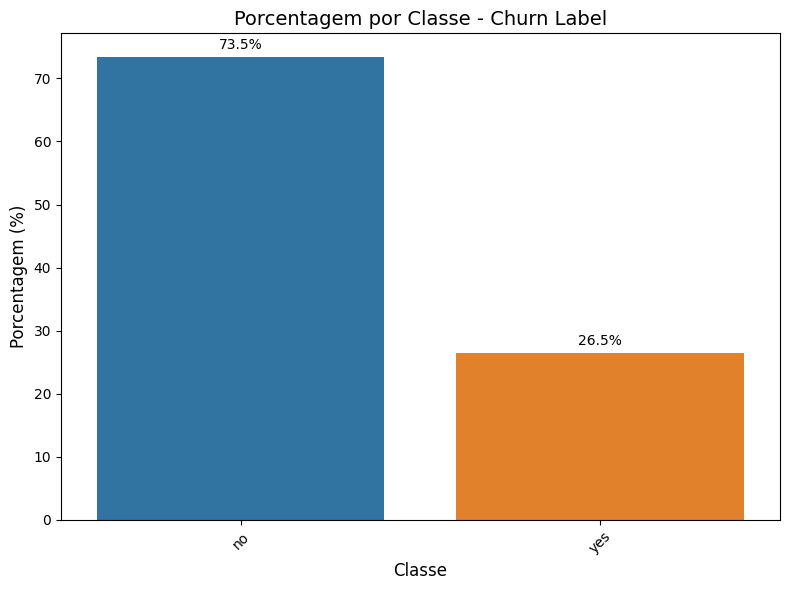

In [7]:
#verificando proporção na classe alvo
from helpers.visualization import plot_porcentagem_por_classe

plot_porcentagem_por_classe(df, 'Churn Label')

### Visualização das features

Aqui, é possível rapidamente visualizar que algumas colunas possuem outliers ou valores imputados erroneamente. Algumas colunas possuem valores máximos impossíveis, como Age, Number of Dependents, talvez Number of Referrals. É possível ver que os valores máximos de muitas colunas são bem próximos e que o count é bem próximo também, indicando que talvez o dataset seja artificial (o que provavelmente é hahah) ou que houve algum erro sistemático de preenchimento dessas informações

In [8]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Avg Monthly GB Streaming Movies,Avg Monthly GB Streaming Music,Avg Monthly GB Streaming TV,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Score
count,7003.000000,7009.000000,7018.000000,7008.000000,7007.000000,7011.000000,7006.000000,7011.000000,7009.000000,7010.000000,7043.000000,7043.000000,7043.000000,7005.000000,7013.000000,7010.000000,7009.000000,7008.000000,7014.000000,7014.000000
mean,93.329716,58.220859,93536.683528,71.956739,-62.458888,22163.282556,45.994148,83.940807,72.133845,73.013980,0.429788,0.431634,0.417862,113.265496,2335.464536,58.971673,48.008275,789.642837,3089.030676,103.265469
std,543.182471,601.575489,1951.109064,476.081068,640.277834,21154.150823,519.690378,590.009467,562.238515,583.751484,0.864756,0.868509,0.850784,572.427272,2356.205392,605.528820,498.990015,974.146779,2916.963485,541.456957
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,5.000000
25%,32.000000,0.000000,92108.000000,33.993991,-121.777179,2349.000000,0.000000,9.000000,9.330000,4.000000,0.000000,0.000000,0.000000,35.800000,407.050000,0.000000,0.000000,72.607500,619.702500,41.000000
50%,46.000000,0.000000,93531.000000,36.296851,-119.486225,17494.000000,0.000000,29.000000,23.180000,17.000000,0.000000,0.000000,0.000000,70.550000,1412.650000,0.000000,0.000000,413.370000,2160.355000,62.000000
75%,60.000000,0.000000,95345.000000,38.224869,-117.931698,36137.000000,3.000000,56.000000,36.710000,27.000000,0.000000,0.000000,0.000000,90.250000,3856.750000,0.000000,0.000000,1228.132500,4887.487500,76.000000
max,9905.000000,9550.000000,105423.000000,9848.893250,9874.797063,105285.000000,9943.000000,9915.000000,9692.350000,9634.000000,3.000000,3.000000,3.000000,10001.800000,16652.150000,9995.000000,9831.000000,10635.400000,18605.550000,9991.000000


#### Verificando algumas features contínuas
Agora vou fazer uma rápida visualização da distribuição de algumas features usando box plots. Escolhi esse tipo de gráfico porque ele permite entender rapidamente o intervalo da distribuição, identificar a mediana e visualizar facilmente o comportamento dos outliers.

Como é possível ver abaixo, todas as colunas selecionadas apresentam outliers concentrados mais à direita, que acabam puxando a média dessas distribuições para cima, resultando em valores muito altos que não representam a maioria das amostras.

Neste momento eu não irei mexer em nada, a ideia aqui é apenas visualizar.

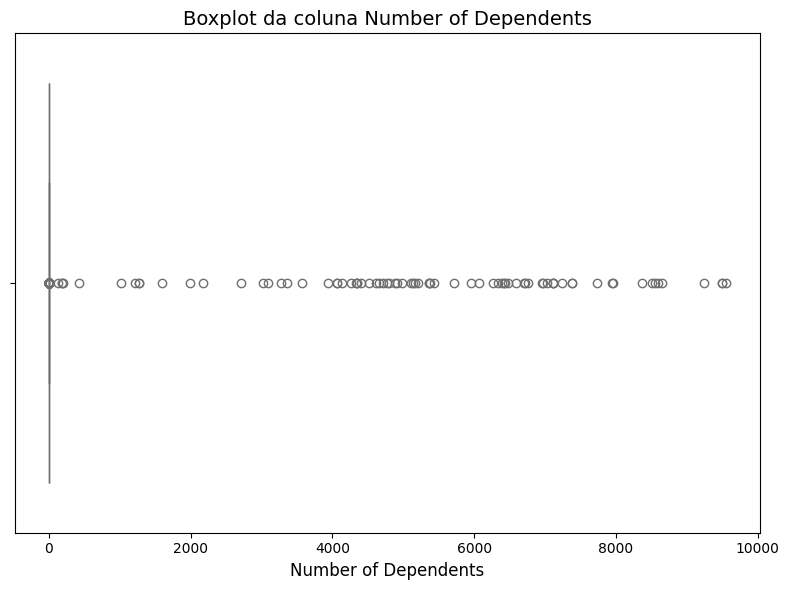

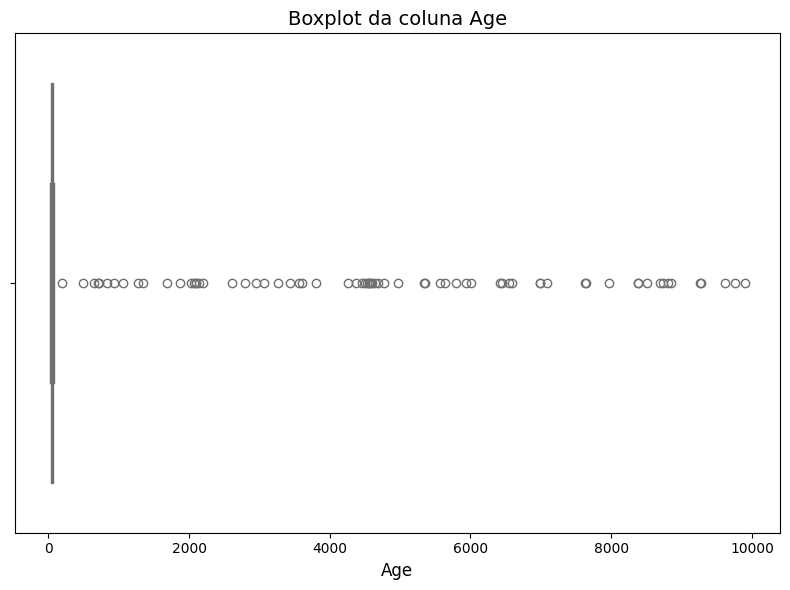

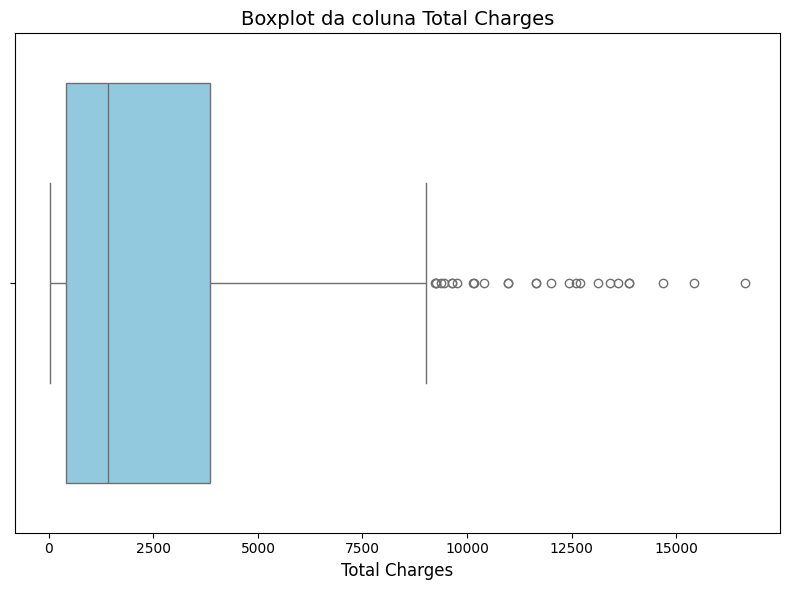

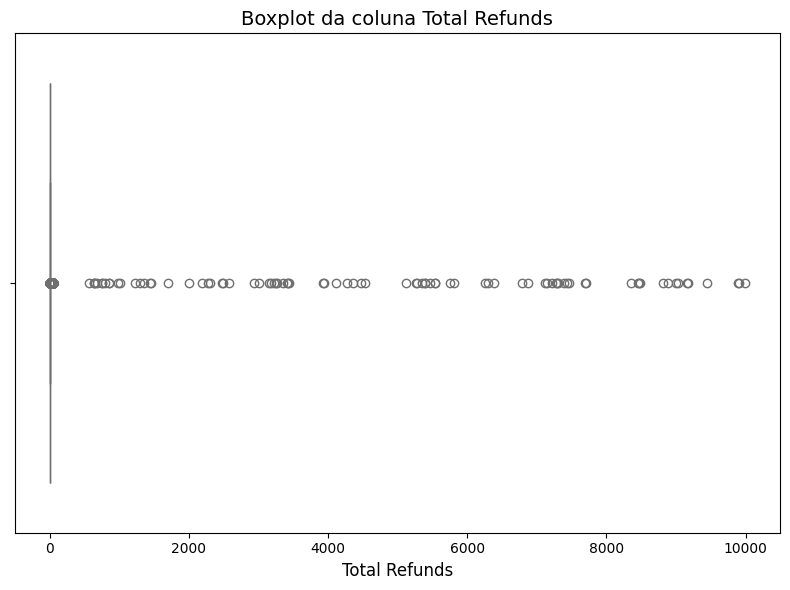

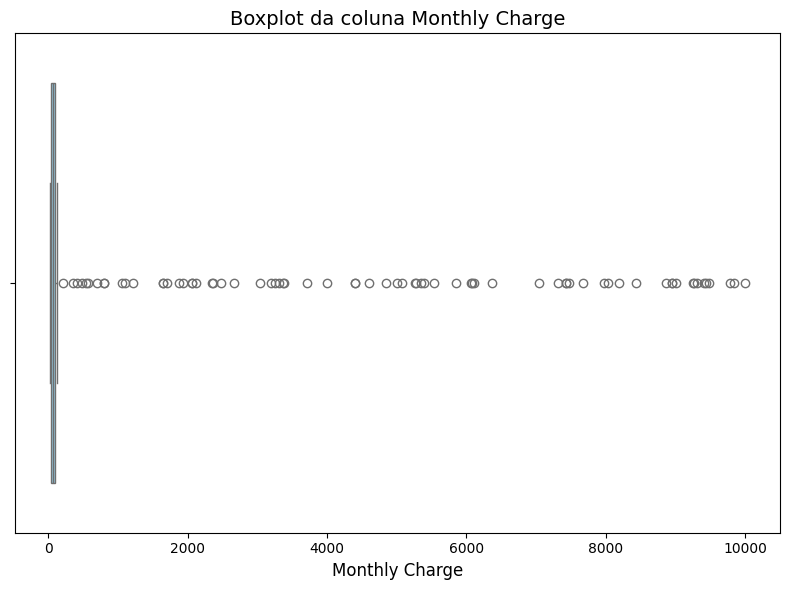

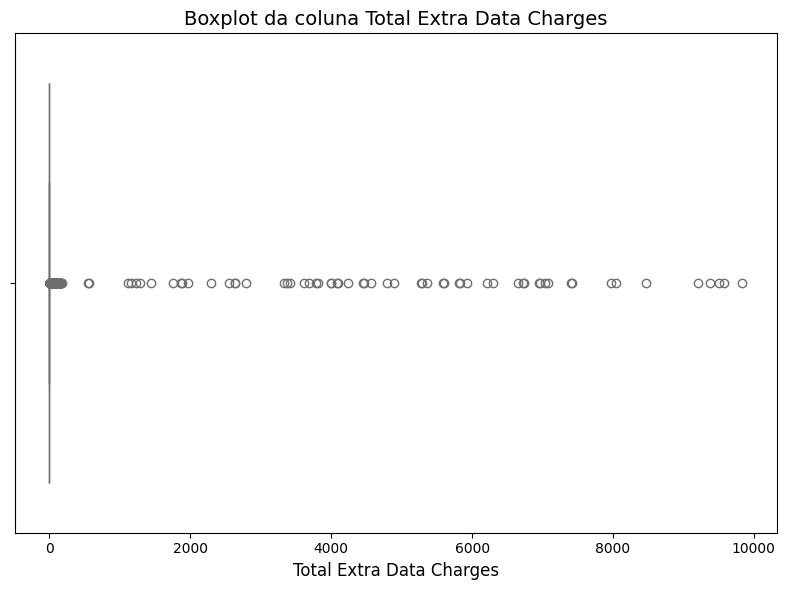

In [9]:
from helpers.visualization import plot_boxplot


#vou escolher algumas features para visualizar a distribuição
colunas_box = ['Number of Dependents', 'Age', 'Total Charges', 'Total Refunds', 'Monthly Charge', 'Total Extra Data Charges']
for col in colunas_box:
    plot_boxplot(df, col)

#### Visualizando categóricas

Para entender melhor as características dos clientes churn e não churn, vou apresentar visualizações comparativas de algumas colunas categóricas.

Um padrão que observei nessas colunas é que os clientes churn apresentam um perfil mais definido, enquanto a distribuição dos clientes não churn tende a ser mais equilibrada. Em várias das features abaixo, fica evidente que os churn se concentram em categorias específicas, o que pode indicar comportamentos ou condições comuns nesse grupo.

In [10]:
from helpers.visualization import plot_porcentagem_por_classe_comparativo

churn_clients = df[df['Churn Label'] == 'yes']
nao_churn = df[df['Churn Label'] == 'no']

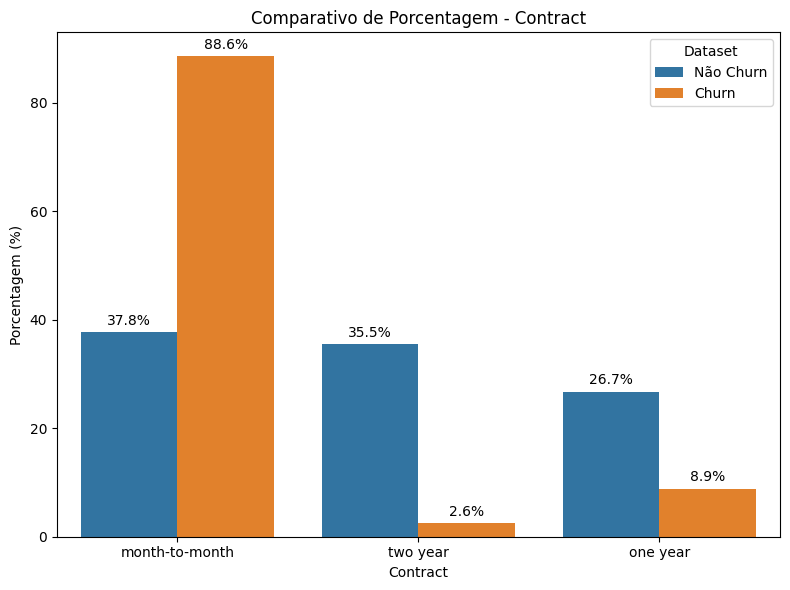

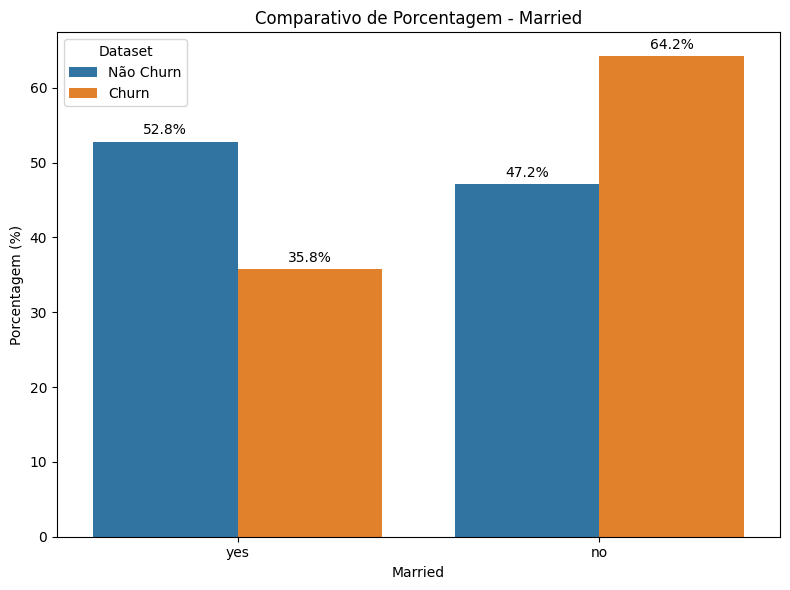

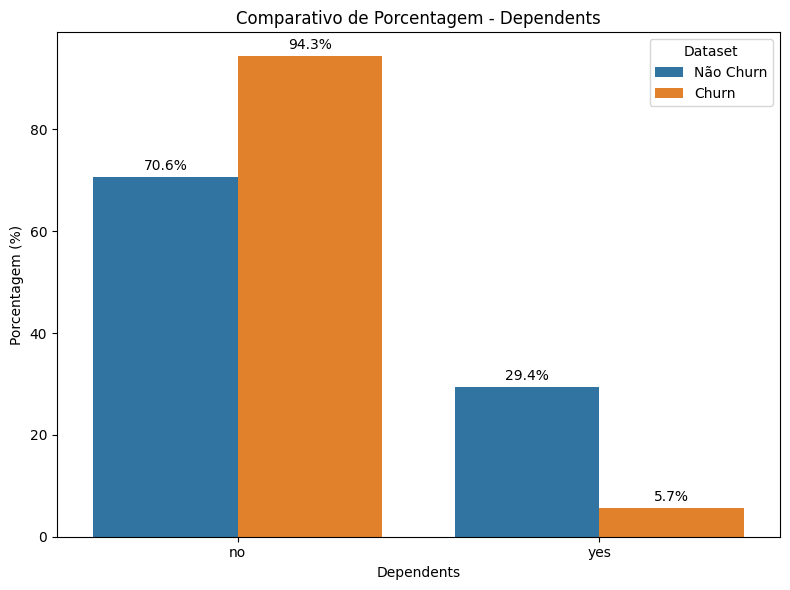

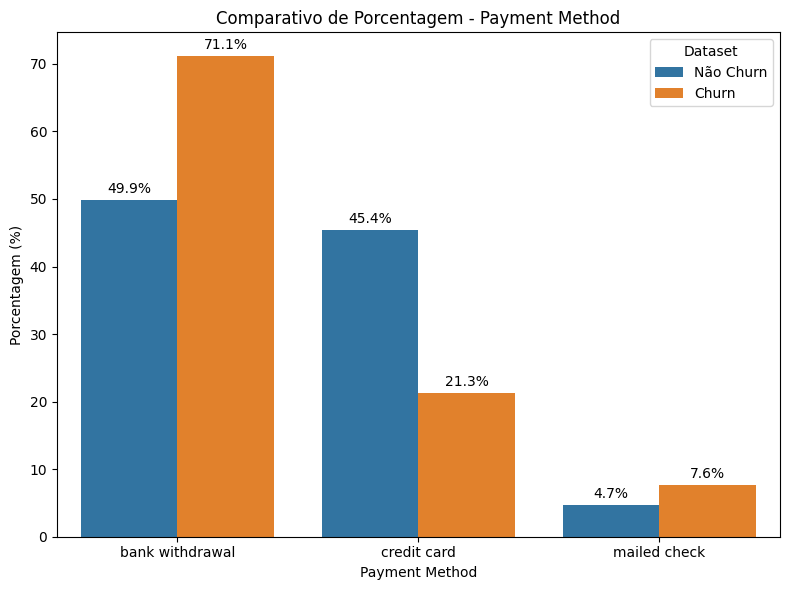

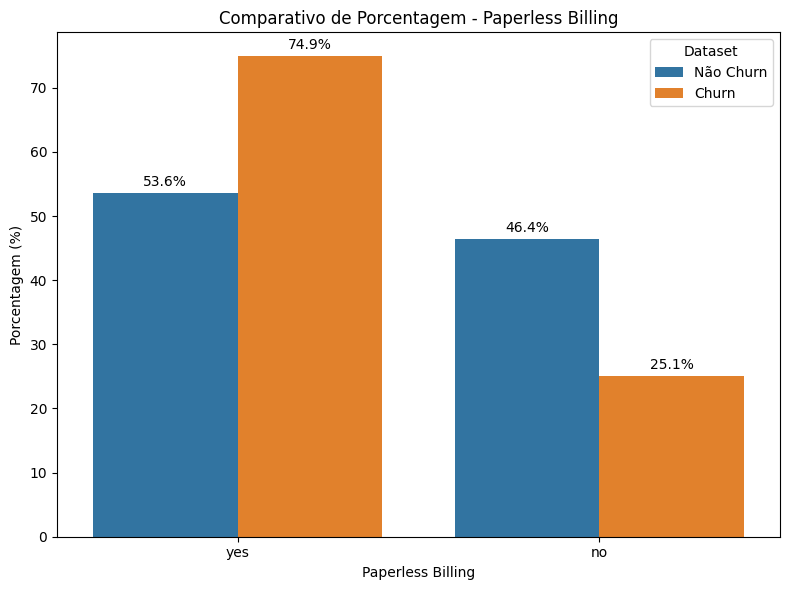

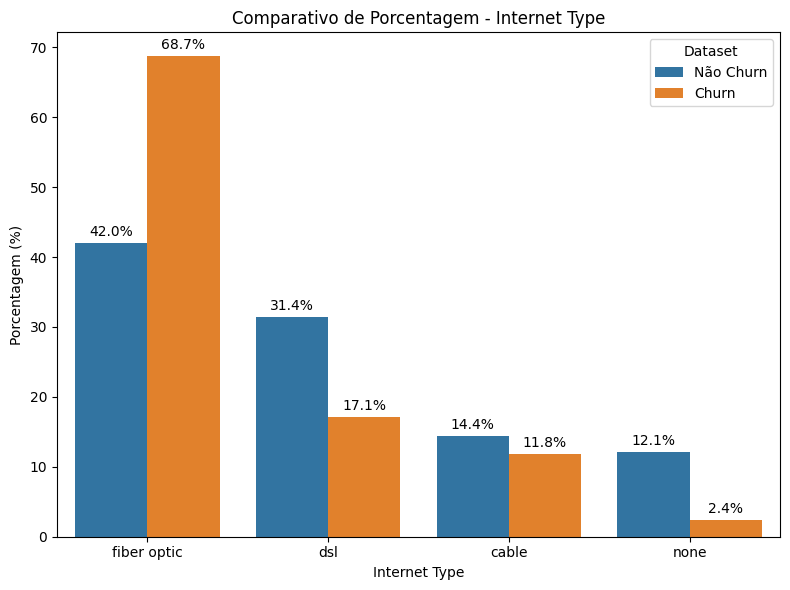

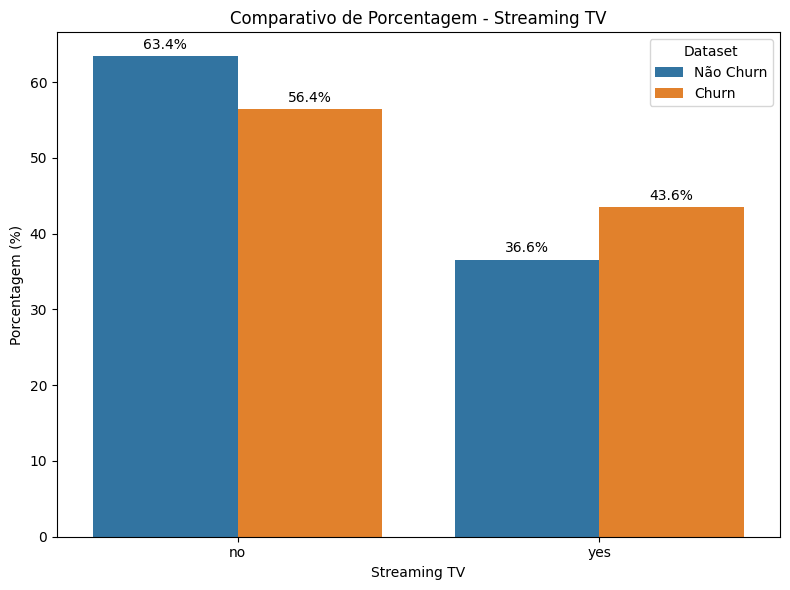

In [11]:
colunas = ['Contract', 'Married', 'Dependents', 'Payment Method', 'Paperless Billing', 'Internet Type','Streaming TV']


for col in colunas:

    plot_porcentagem_por_classe_comparativo(nao_churn, churn_clients, col, label1 = 'Não Churn', label2 = 'Churn') 


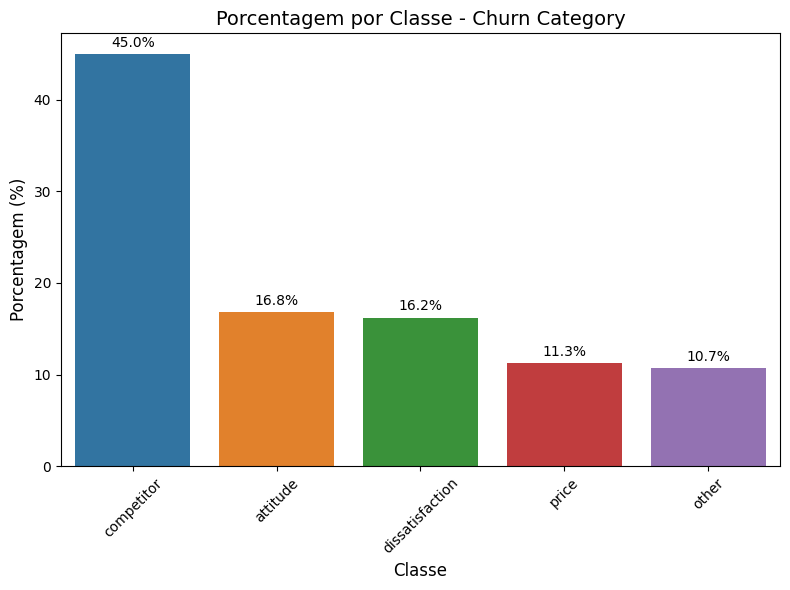

In [12]:
plot_porcentagem_por_classe(df, 'Churn Category')

## Pré processamento


O intuito desta etapa é performar algumas transformações nos dados de forma que eles fiquem elegíveis para algoritmos de machine learning e técnicas de redução de dimensionalidade para visualização. Essa fase inclui a limpeza de valores ausentes (NaNs), tratamento de outliers, conversão de variáveis categóricas em formatos numéricos, e a seleção de colunas relevantes.

### Encoding


Neste passo, transformarei variáveis categóricas textuais em valores numéricos. Algumas dessas variáveis contêm dados ausentes, como observado anteriormente. Existem diferentes estratégias para lidar com esse problema, como:

Remover linhas com valores ausentes

Preencher os dados de forma estratificada, preservando a distribuição observada no conjunto de treino

Tratar valores ausentes como uma categoria própria

Optarei por tratar os valores ausentes como uma categoria específica. Essa abordagem é prática, evita a introdução de dados artificiais — conforme mencionado anteriormente que é algo que evitarei fazer— e pode melhorar a interpretabilidade, especialmente se a ausência de dados for sistemática.

In [13]:
from helpers.data_processing import encode_columns

#adicionando zip code às colunas para fazer encoding porque não é um variável da qual podemos calcular uma distancia
#direta entre uma e outra

cols_to_encode = df.select_dtypes(include=['object']).columns.tolist()
cols_to_encode.append('Zip Code')
cols_to_encode.remove('Customer ID') #removendo coluna de identificador que não vamos utilizar

#essa função faz o encoding das colunas passadas, salva em um dicionário as chaves de conversão e considera valores NA como uma categoria própria
df_encoded, mappings = encode_columns(df.drop(columns='Customer ID'), columns=cols_to_encode, na_label = "desconhecido")
df_encoded.head()

,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Avg Monthly GB Streaming Movies,Avg Monthly GB Streaming Music,Avg Monthly GB Streaming TV,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Label,Churn Score,Churn Category,Churn Reason
0,1,78.0,0,0,0.0,0,0,554,46,34.023810,-118.156582,68701.0,0,0,0.0,1.0,0,0,0.00,0,2,8.0,0,0,1,0,0,1,0,0,2,0,0,0,1,0,39.65,39.65,0.00,20.0,0.00,59.65,0,1,91.0,1,5
1,0,74.0,1,1,1.0,0,0,554,79,34.044271,-118.185237,55668.0,0,1,1.0,8.0,6,1,48.85,1,3,17.0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,80.65,633.30,0.00,0.0,390.80,1024.10,0,1,69.0,1,3
2,1,71.0,0,1,3.0,0,0,554,81,34.108833,-118.229715,47534.0,0,0,0.0,18.0,5,1,11.33,1,3,52.0,0,0,0,0,1,1,1,0,0,2,1,0,1,0,95.45,8739.55,45.61,0.0,203.94,1910.88,0,1,81.0,1,3
3,0,78.0,1,1,1.0,0,0,448,125,33.936291,-118.332639,27778.0,0,1,1.0,25.0,4,1,19.76,0,3,12.0,0,1,1,0,1,1,0,2,0,0,1,0,1,0,98.50,2514.50,13.43,0.0,494.00,2995.07,0,1,88.0,3,12
4,0,80.0,1,1,1.0,0,0,1072,1690,33.972119,-118.020188,26265.0,0,1,1.0,37.0,4,1,6.33,1,3,14.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,76.50,2868.15,0.00,0.0,234.21,3102.36,0,1,67.0,5,9


In [14]:
#exemplo de uso do dicionario de mapeamento
mappings['Churn Label']

{'no': np.int64(0), 'yes': np.int64(1)}

### Splits

Antes de aplicar técnicas de tratamento de outliers e normalização, é necessário dividir o dataset em conjuntos de treino, validação e teste.Isso garante que todas as transformações que dependem dos dados - como cálculos de estatísticas - sejam feitas exclusivamente no conjunto de treino, evitando vazamento de dados.

Optei pela divisão 70/15/15. Essa proporção garante conjuntos de validação e teste com o mesmo tamanho, sem comprometer a quantidade de dados disponíveis para o treinamento do modelo.

In [15]:
#divisão treino-val-teste -> 70-15-15
from sklearn.model_selection import train_test_split

#vou aproveitar para remover as outras colunas relacionadas ao rótulo
X = df_encoded.drop(columns=['Churn Label', 'Customer Status', 'Churn Score', 'Churn Category', 'Churn Reason'])
y = df_encoded['Churn Label']

#estratificando com base na distribuição do y e embaralhando os splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

### Tratamento de outliers e valores ausentes 

Para evitar perda de dados, o que pode impactar na generalização e avaliação dos modelos, vou utilzar algumas técnicas de imputação para lidar com valores ausente e outliers.

A princípio pensei em tratar os valores ausentes da seguinte maneira:
- segmentar os dados em 2 clusters (não segmentarei com base no rótulo pois não teremos isso em produção)
- imputar a mediana de acordo com cluster  
- criar uma coluna binária associada a esta coluna que sinalizaria se algum valor ali originalmente era ausente

A vantagem dessa abordagem é que temos uma imputação robusta -ja que o valor utilizado é a mediana-, que respeita o comportamento dos dados, e transmite sua estrutura original, através da coluna binária. A desvantagem dessa abordagem, ao meu ver, é justamente o aumento de dimensionalidade que temos ao criar essa nova coluna, que por sua vez pode trazer ruído e aumento de variância, ainda mais considerando que temos 42 colunas no nosso X. Dessa forma, vou apenas executar o passo 1 e 2. O passo 3 pode ficar para experimentos futuros. 

In [16]:
# a quantidade de valores ausentes é relevante o bastante para eu escolher não eliminar
# nao vou quantificar os outliers porque pelo que vi na analise exploratoria praticamente todas as colunas
# numericas possuiam alguns 

na_qtd = df.select_dtypes(include=['int64', 'float64']).isna().any(axis=1).sum()

na_qtd/df.shape[0] *100

np.float64(7.709782763027119)

In [31]:
from sklearn.cluster import KMeans
from helpers.clustering import *


cluster_features = X_train.columns.tolist()

median_dict, kmeans_model = fit_cluster_features(X_train, cluster_features)

#Aplicando transformação nos conjuntos
X_train_clust = transform_cluster_features(X_train, cluster_features, median_dict, kmeans_model)
X_val_clust = transform_cluster_features(X_val, cluster_features, median_dict, kmeans_model)
X_test_clust = transform_cluster_features(X_test, cluster_features, median_dict, kmeans_model)

In [32]:
from helpers.imputer import ClusterWiseImputerOutlierHandler

#selecionando as colunas numericas e continuas com base no df original, ja que agora as categoricas passsaram pelo encoding
#removi algumas colunsa que nao faziam sentido estar nessa lista

colunas_numericas_continuas = df.select_dtypes(include=['int64', 'float64'])
colunas_numericas_continuas = colunas_numericas_continuas.drop(columns=['Churn Score', 'Zip Code', 'Latitude', 'Longitude']).columns.tolist()

transformer = ClusterWiseImputerOutlierHandler(cluster_col='cluster', variables=colunas_numericas_continuas)

#aplicando transformações
X_train_cleaned = transformer.fit_transform(X_train_clust).drop(columns=['Latitude', 'Longitude'])
X_val_cleaned = transformer.transform(X_val_clust).drop(columns=['Latitude', 'Longitude'])
X_test_cleaned = transformer.transform(X_test_clust).drop(columns=['Latitude', 'Longitude'])



In [33]:
qtd_na = X_train_cleaned.isna().sum().sum() + X_val_cleaned.isna().sum().sum() + X_test_cleaned.isna().sum().sum()
print(f'quantidade de NA: {qtd_na}')

quantidade de NA: 0


### Normalização

In [34]:
# normalizando
from helpers.data_processing import normalizar_colunas_numericas

X_train_scaled, X_val_scaled, X_test_scaled = normalizar_colunas_numericas(
    X_train_cleaned, X_val_cleaned, X_test_cleaned, colunas_numericas_continuas
)

### UMAP

### Seleção de features

In [36]:
# seleção de features automatizada
## escolhi seleção e não a combinação por questão de interpretabilidade

from sklearn.feature_selection import SelectKBest, mutual_info_classif

X_sel = X_train_scaled   #selecionando com base no conj de treino
y_sel = y_train

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X_sel, y_sel)

scores = pd.Series(selector.scores_, index=X_train_scaled.columns).sort_values(ascending=False)
scores

Contract                             0.126720
Tenure in Months                     0.068072
Number of Referrals                  0.065648
Total Charges                        0.045053
Monthly Charge                       0.044711
Avg Monthly GB Download              0.041411
Total Revenue                        0.040289
Internet Type                        0.037350
Total Long Distance Charges          0.033114
Dependents                           0.027610
Online Security                      0.026874
Offer                                0.024914
Age                                  0.024284
Population                           0.021538
Premium Tech Support                 0.020993
Zip Code                             0.020520
Payment Method                       0.020296
City                                 0.018937
Unlimited Data                       0.018813
Paperless Billing                    0.013272
Married                              0.012722
Streaming Movies                  

In [37]:
# vou pegar todas acima de 0.01

colunas_selecionadas = scores[scores>0.01].index.tolist()

X_train_sel = X_train_scaled[colunas_selecionadas]
X_val_sel = X_val_scaled[colunas_selecionadas]
X_test_sel = X_test_scaled[colunas_selecionadas]

## Treinamento e avaliação



### Experimentação inicial

Avaliando o desempenho dos algoritmos abaixo, notamos que a seleção de features, apesar de não trazer um ganho significante nas métricas selecionadas, trouxe uma melhor eficiência no tempo de inferência na maioria dos casos. Além disso, contribuiu para a redução da complexidade do modelo e menor consumo de recursos computacionais.

In [ ]:
from helpers.classification import evaluate_ensemble_tree_models


#avaliando desempenho dos algoritmos apenas no subconjunto de colunas selecionadas
resultados_sel = evaluate_ensemble_tree_models(X_train_sel, y_train, X_val_sel, y_val)
resultados_sel

c:\Users\cat13\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:47:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2008
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527


,Modelo,F1-score,Recall,MCC,Balanced Accuracy,AUC,Tempo de Inferência (s)
4,CatBoost,0.718045,0.682143,0.625005,0.801767,0.914074,0.003513
3,LightGBM,0.709434,0.671429,0.614257,0.795766,0.910249,0.005516
1,GradientBoosting,0.708333,0.667857,0.613588,0.794624,0.909771,0.004548
6,HistGradientBoosting,0.698473,0.653571,0.602112,0.787482,0.905578,0.007510
2,XGBoost,0.693333,0.650000,0.594822,0.784407,0.902660,0.008522
0,RandomForest,0.678295,0.625000,0.578963,0.773196,0.895409,0.029886
5,ExtraTrees,0.670611,0.607143,0.573467,0.766845,0.889769,0.052180


In [ ]:
#avaliando desempenho dos algoritmos em todo conjunto de colunas
resultados = evaluate_ensemble_tree_models(X_train_scaled, y_train, X_val_scaled, y_val)
resultados

c:\Users\cat13\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527


,Modelo,F1-score,Recall,MCC,Balanced Accuracy,AUC,Tempo de Inferência (s)
6,HistGradientBoosting,0.718336,0.678571,0.626556,0.801270,0.907290,0.008024
3,LightGBM,0.715105,0.667857,0.624717,0.797846,0.912293,0.006023
4,CatBoost,0.714829,0.671429,0.623083,0.798343,0.915142,0.005513
0,RandomForest,0.705179,0.632143,0.621982,0.787077,0.900179,0.031330
1,GradientBoosting,0.704762,0.660714,0.610069,0.791697,0.910222,0.005576
2,XGBoost,0.700758,0.660714,0.603467,0.789764,0.904266,0.009023
5,ExtraTrees,0.673307,0.603571,0.579863,0.767636,0.896049,0.041915


### Validação cruzada

Para validar a robustez dos resultados, selecionarei os 3 algoritmos com melhor desempenho nas métricas avaliadas e os submeterei à validação cruzada. Essa abordagem permitirá uma análise mais aprofundada do recall e uma compreensão mais sólida da capacidade de generalização dos modelos, minimizando possíveis vieses decorrentes de uma única divisão dos dados.


In [ ]:
from helpers.classification import evaluate_models_cv

from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tempfile


temp_dir = tempfile.gettempdir()  # pasta temporária do sistema
catboost_dir = os.path.join(temp_dir, "catboost_temp")
                               
X_fold = pd.concat([X_train_sel, X_val_sel])
y_fold = pd.concat([y_train, y_val])
random_state=42
models = {
        "GradientBoosting": GradientBoostingClassifier(random_state=random_state),
        "LightGBM": LGBMClassifier(random_state=random_state),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=random_state, train_dir=catboost_dir)
    }

In [52]:
cross_val_results = evaluate_models_cv(models, X_fold, y_fold, n_splits = 10, scoring = 'recall')

🔄 Iniciando avaliação de 3 modelos usando 10-Fold CV
📊 Métrica: recall
------------------------------------------------------------
Avaliando: GradientBoosting... ✅ 0.6568 (±0.0422) [3.45s]
Avaliando: LightGBM... ✅ 0.6494 (±0.0389) [2.31s]
Avaliando: CatBoost... ✅ 0.6564 (±0.0361) [23.87s]
------------------------------------------------------------
🏆 RANKING DOS MODELOS:
          modelo  score_medio  score_std  score_min  score_max
GradientBoosting       0.6568     0.0422     0.5912     0.7186
        CatBoost       0.6564     0.0361     0.5912     0.7086
        LightGBM       0.6494     0.0389     0.5886     0.7126


In [53]:
cross_val_results

,modelo,score_medio,score_std,score_min,score_max,cv_scores
0,GradientBoosting,0.656753,0.042179,0.591195,0.718563,"[0.6942675159235668, 0.6842105263157895, 0.685..."
2,CatBoost,0.656393,0.036113,0.591195,0.708571,"[0.6815286624203821, 0.6907894736842105, 0.708..."
1,LightGBM,0.649404,0.038858,0.588608,0.712575,"[0.6878980891719745, 0.6644736842105263, 0.68,..."


### Avaliação individual

Aqui seguirei com apenas 1 algoritmo, para uma avaliação mais detalhada no conjunto de teste. O algortimo escolhido foi o catboost, por ter um desvio padrão ligeiramente menor (acredito que no exemplo acima não faça muita diferença, mas a ideia é escolher um modelo com resultados mais coesos)

In [62]:
from sklearn.metrics import (confusion_matrix, classification_report, 
                           roc_curve, auc, roc_auc_score)

default_params = {
        'iterations': 1000,
        'learning_rate': 0.1,
        'depth': 6,
        'eval_metric': 'Recall',
        'random_seed': 42,
        'verbose': 100,
        'early_stopping_rounds': 50
    }

model = CatBoostClassifier(**default_params, train_dir=catboost_dir)

model.fit(
        X_train_sel, y_train,
        eval_set=(X_val_sel, y_val),
        plot=True
    )

# Fazer predições
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6376147	test: 0.6357143	best: 0.6357143 (0)	total: 5.28ms	remaining: 5.27s
100:	learn: 0.7545872	test: 0.6821429	best: 0.6892857 (70)	total: 574ms	remaining: 5.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6892857143
bestIteration = 70

Shrink model to first 71 iterations.


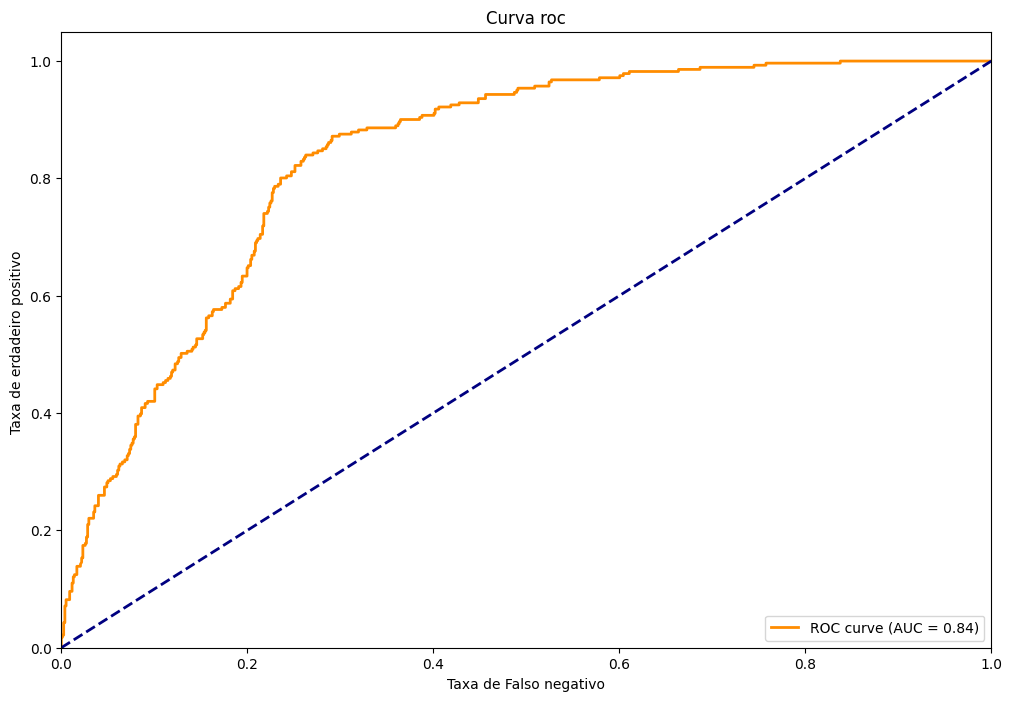

In [91]:
from sklearn.metrics import roc_curve, auc


# Calcular curva 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# plotar
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso negativo')
plt.ylabel('Taxa de erdadeiro positivo ')
plt.title('Curva roc')
plt.legend(loc="lower right")

In [90]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       776
           1       0.56      0.57      0.57       281

    accuracy                           0.77      1057
   macro avg       0.70      0.70      0.70      1057
weighted avg       0.77      0.77      0.77      1057



O modelo parece ser melhor na identificação de casos negativos do que de casos positivos. As taxas relativamente altas de falsos positivos e falsos negativos sugerem que o modelo pode se beneficiar de um ajuste de limite de decisão

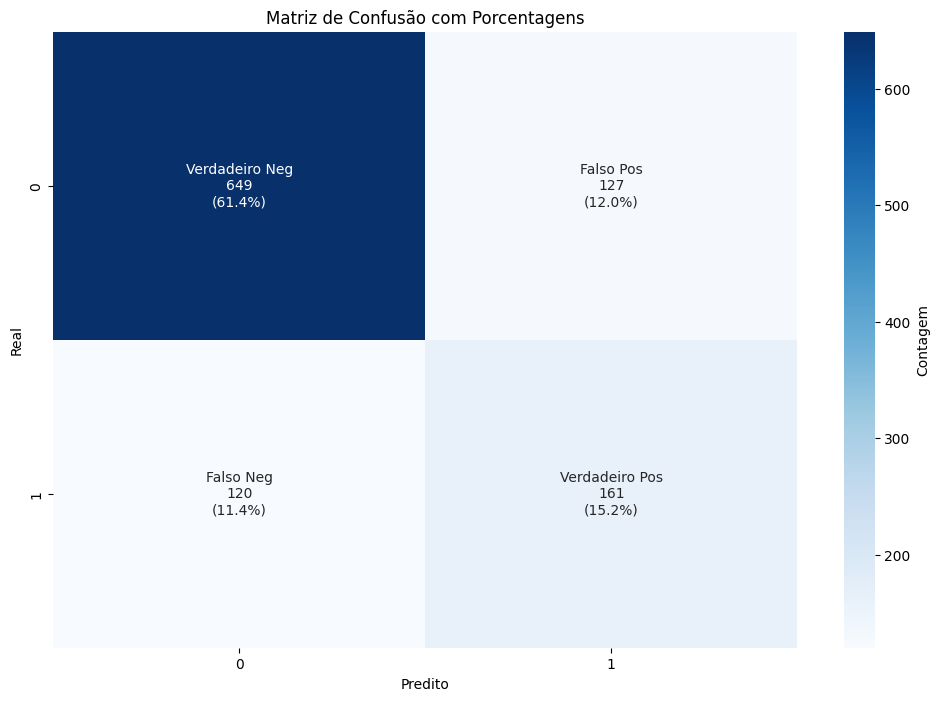

In [72]:
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum() * 100

# Criar labels com contagem e porcentagem
labels = np.asarray([
    f'Verdadeiro Neg\n{cf_matrix[0,0]}\n({cf_matrix_percent[0,0]:.1f}%)',
    f'Falso Pos\n{cf_matrix[0,1]}\n({cf_matrix_percent[0,1]:.1f}%)',
    f'Falso Neg\n{cf_matrix[1,0]}\n({cf_matrix_percent[1,0]:.1f}%)',
    f'Verdadeiro Pos\n{cf_matrix[1,1]}\n({cf_matrix_percent[1,1]:.1f}%)'
]).reshape(2,2)

plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', 
            cbar_kws={'label': 'Contagem'})
plt.title('Matriz de Confusão com Porcentagens')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [ ]:
feature_importance = model.get_feature_importance()
feature_names = X.columns

# Ordena por importancia 
sorted_idx = np.argsort(feature_importance)[::-1]  # [::-1] reverses for descending order

print("Feature Importance:")
for idx in sorted_idx:
    print(f"Feature: {feature_names[idx]}, Importancia: {feature_importance[idx]:.4f}")

Feature Importance:
Feature: Gender, Importancia: 21.4876
Feature: Married, Importancia: 17.1087
Feature: Latitude, Importancia: 9.5322
Feature: Number of Dependents, Importancia: 7.7610
Feature: Quarter, Importancia: 5.6275
Feature: Offer, Importancia: 4.2015
Feature: Age, Importancia: 4.0950
Feature: City, Importancia: 3.6233
Feature: Phone Service, Importancia: 3.6183
Feature: Country, Importancia: 3.4246
Feature: Tenure in Months, Importancia: 2.6456
Feature: Referred a Friend, Importancia: 2.1479
Feature: State, Importancia: 2.0602
Feature: Dependents, Importancia: 2.0456
Feature: Internet Type, Importancia: 1.9236
Feature: Population, Importancia: 1.8597
Feature: Multiple Lines, Importancia: 1.8335
Feature: Zip Code, Importancia: 1.7474
Feature: Longitude, Importancia: 1.2889
Feature: Number of Referrals, Importancia: 1.2311
Feature: Avg Monthly Long Distance Charges, Importancia: 0.7369


## 2 -
 Não consegui pensar em muitas features novas para usar, visto que sinto que não explorei o bastante as que tenho atualmente. Mas um dado que talvez seja interessante de ter aqui é como o cliente chegou à empresa, se foi por indicação, anúncio, abordagem do comercial. Talvez esses dados tragam insights legais

## 3 - 

Próximos passos envolvem um ajuste fino no modelo escolhido, trabalhando em melhorar o limiar de decisão para tentar diminuir a taxa de falsos negativos. Também incluiria um trabalho mais focado em desenvolver as features de geolocalização para conseguir extrair insights mais latentes. Além disso, poderiam ser testadas outras abordagens de pré processamento (no tratamento de NA e outliers) e feito o comparativo com a abordagem atual. Também investigaria melhor os relacionamentos entre as features, principalmente essas consideradas mais importantes. Eu gostaria de ter feito uma análise de correlação e plotagem dos dados com o UMAP, mas não deu tempo. Outro ponto interessante de ser testado, é incluir outras formas de seleção de features, para também ter esse comparativo. Seria interessante tentar uma classificação multiclasse futuramente com a coluna churn reason